In [1]:
import pandas as pd
from gensim import utils
from gensim.models.doc2vec import TaggedDocument
from gensim.models import Doc2Vec
from gensim.parsing.preprocessing import preprocess_string, remove_stopwords
import random
import warnings
warnings.filterwarnings("ignore")

/opt/anaconda3/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
sample_news_data = '/Users/kaylanguyen/Documents/TheNLPWorkshop/Chapter6/sample_news_data.txt'

In [3]:
with open(sample_news_data, encoding='utf-8', errors='ignore') as f:
    news_lines = [line for line in f.readlines()]

In [4]:
lines_df = pd.DataFrame()
indices = list(range(len(news_lines)))
lines_df['news'] = news_lines
lines_df['index'] = indices

In [5]:
lines_df.head()

,news,index
0,Top of the Pops leaves BBC One The BBC flagshi...,0
1,Oscars race enters final furlong The race for ...,1
2,US TV special for tsunami relief A US televisi...,2
3,Singer Ian Brown gig Former Stone Roses singer...,3
4,Housewives lift Channel ratings The debut of U...,4


In [8]:
class DocumentDataset(object):
    def __init__(self, data:pd.DataFrame, column):
        document = data[column].apply(self.preprocess)
        self.documents = [TaggedDocument(text, [index]) for index, text in document.iteritems()]
    
    def preprocess(self, document):
        return preprocess_string(remove_stopwords(document))
    
    def __iter__(self):
        for document in self.documents:
            yield document
            
    def tagged_documents(self, shuffle=False):
        if shuffle:
            random.shuffle(self.documents)
        return self.documents

In [9]:
documents_dataset = DocumentDataset(lines_df, 'news')

In [ ]:
docVecModel = Doc2Vec(min_count=1, window=5, vector_size=100, sample=1e-4, negative=5,
                     workers=8)
docVecModel.build_vocab(documents_dataset.tagged_documents())

>**epochs** represents the **total number of records** required to train the document.

In [11]:
docVecModel.train(documents_dataset.tagged_documents(shuffle=True), 
                  total_examples=docVecModel.corpus_count, epochs=10)

In [12]:
docVecModel.save('/Users/kaylanguyen/Documents/TheNLPWorkshop/Chapter6/docVecModel.d2v')

In [13]:
#find the doc vector of index 657
docVecModel[657]

array([-4.4119456e-01,  3.7332022e-01,  8.2436258e-01,  9.7008318e-02,
       -3.1727090e-01, -6.3771087e-01, -2.4199288e-01, -3.7163508e-01,
       -6.5547472e-01, -3.8436061e-01, -4.0369830e-01, -5.9078544e-01,
       -5.1613189e-02,  3.2425022e-01,  3.3887935e-01, -4.1455948e-01,
        3.3572715e-02, -5.9851176e-01,  3.3235991e-01, -9.6054226e-01,
        5.2745008e-01, -9.8594673e-02,  4.8267819e-02, -2.2404134e-01,
        9.7304434e-02, -2.9418582e-01, -3.4232408e-01, -2.5893512e-01,
       -4.1977923e-02,  6.7904435e-02,  6.1612833e-01,  4.6705279e-01,
       -3.6668345e-02, -6.3991182e-02,  6.7446493e-02,  2.7359533e-01,
        5.4306376e-01, -4.6032771e-01,  5.0250095e-01, -6.0711783e-01,
        1.2516390e-02, -2.2051679e-01, -6.3590318e-01, -2.3276877e-01,
       -4.3294375e-04, -4.5683491e-01,  3.1686911e-01,  2.4531685e-01,
        3.7811375e-01,  2.6698855e-01,  3.6586699e-01, -6.5099615e-01,
        1.3382141e-02, -1.9847308e-01,  8.6519912e-02,  2.2927199e-01,
      

In [19]:
import matplotlib.pyplot as plt
def show_image(vector, line):
    fig, ax = plt.subplots(1, 1, figsize=(10,2))
    ax.tick_params(axis='both',
                   which='both',
                   left=False,
                   bottom=False,
                   top=False,
                   labelleft=False,
                   labelbottom=False)
    ax.grid(False)
    print(line)
    ax.bar(range(len(vector)), vector, 0.5)

def show_news_lines(line_number):
    line = lines_df[lines_df.index==line_number].news
    doc_vector = docVecModel[line_number]
    show_image(doc_vector, line)

872    Jobs go at Oracle after takeover Oracle has an...
Name: news, dtype: object


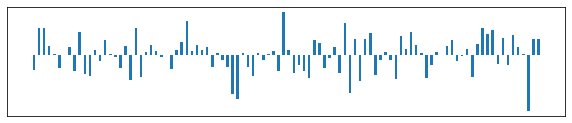

In [20]:
show_news_lines(872)